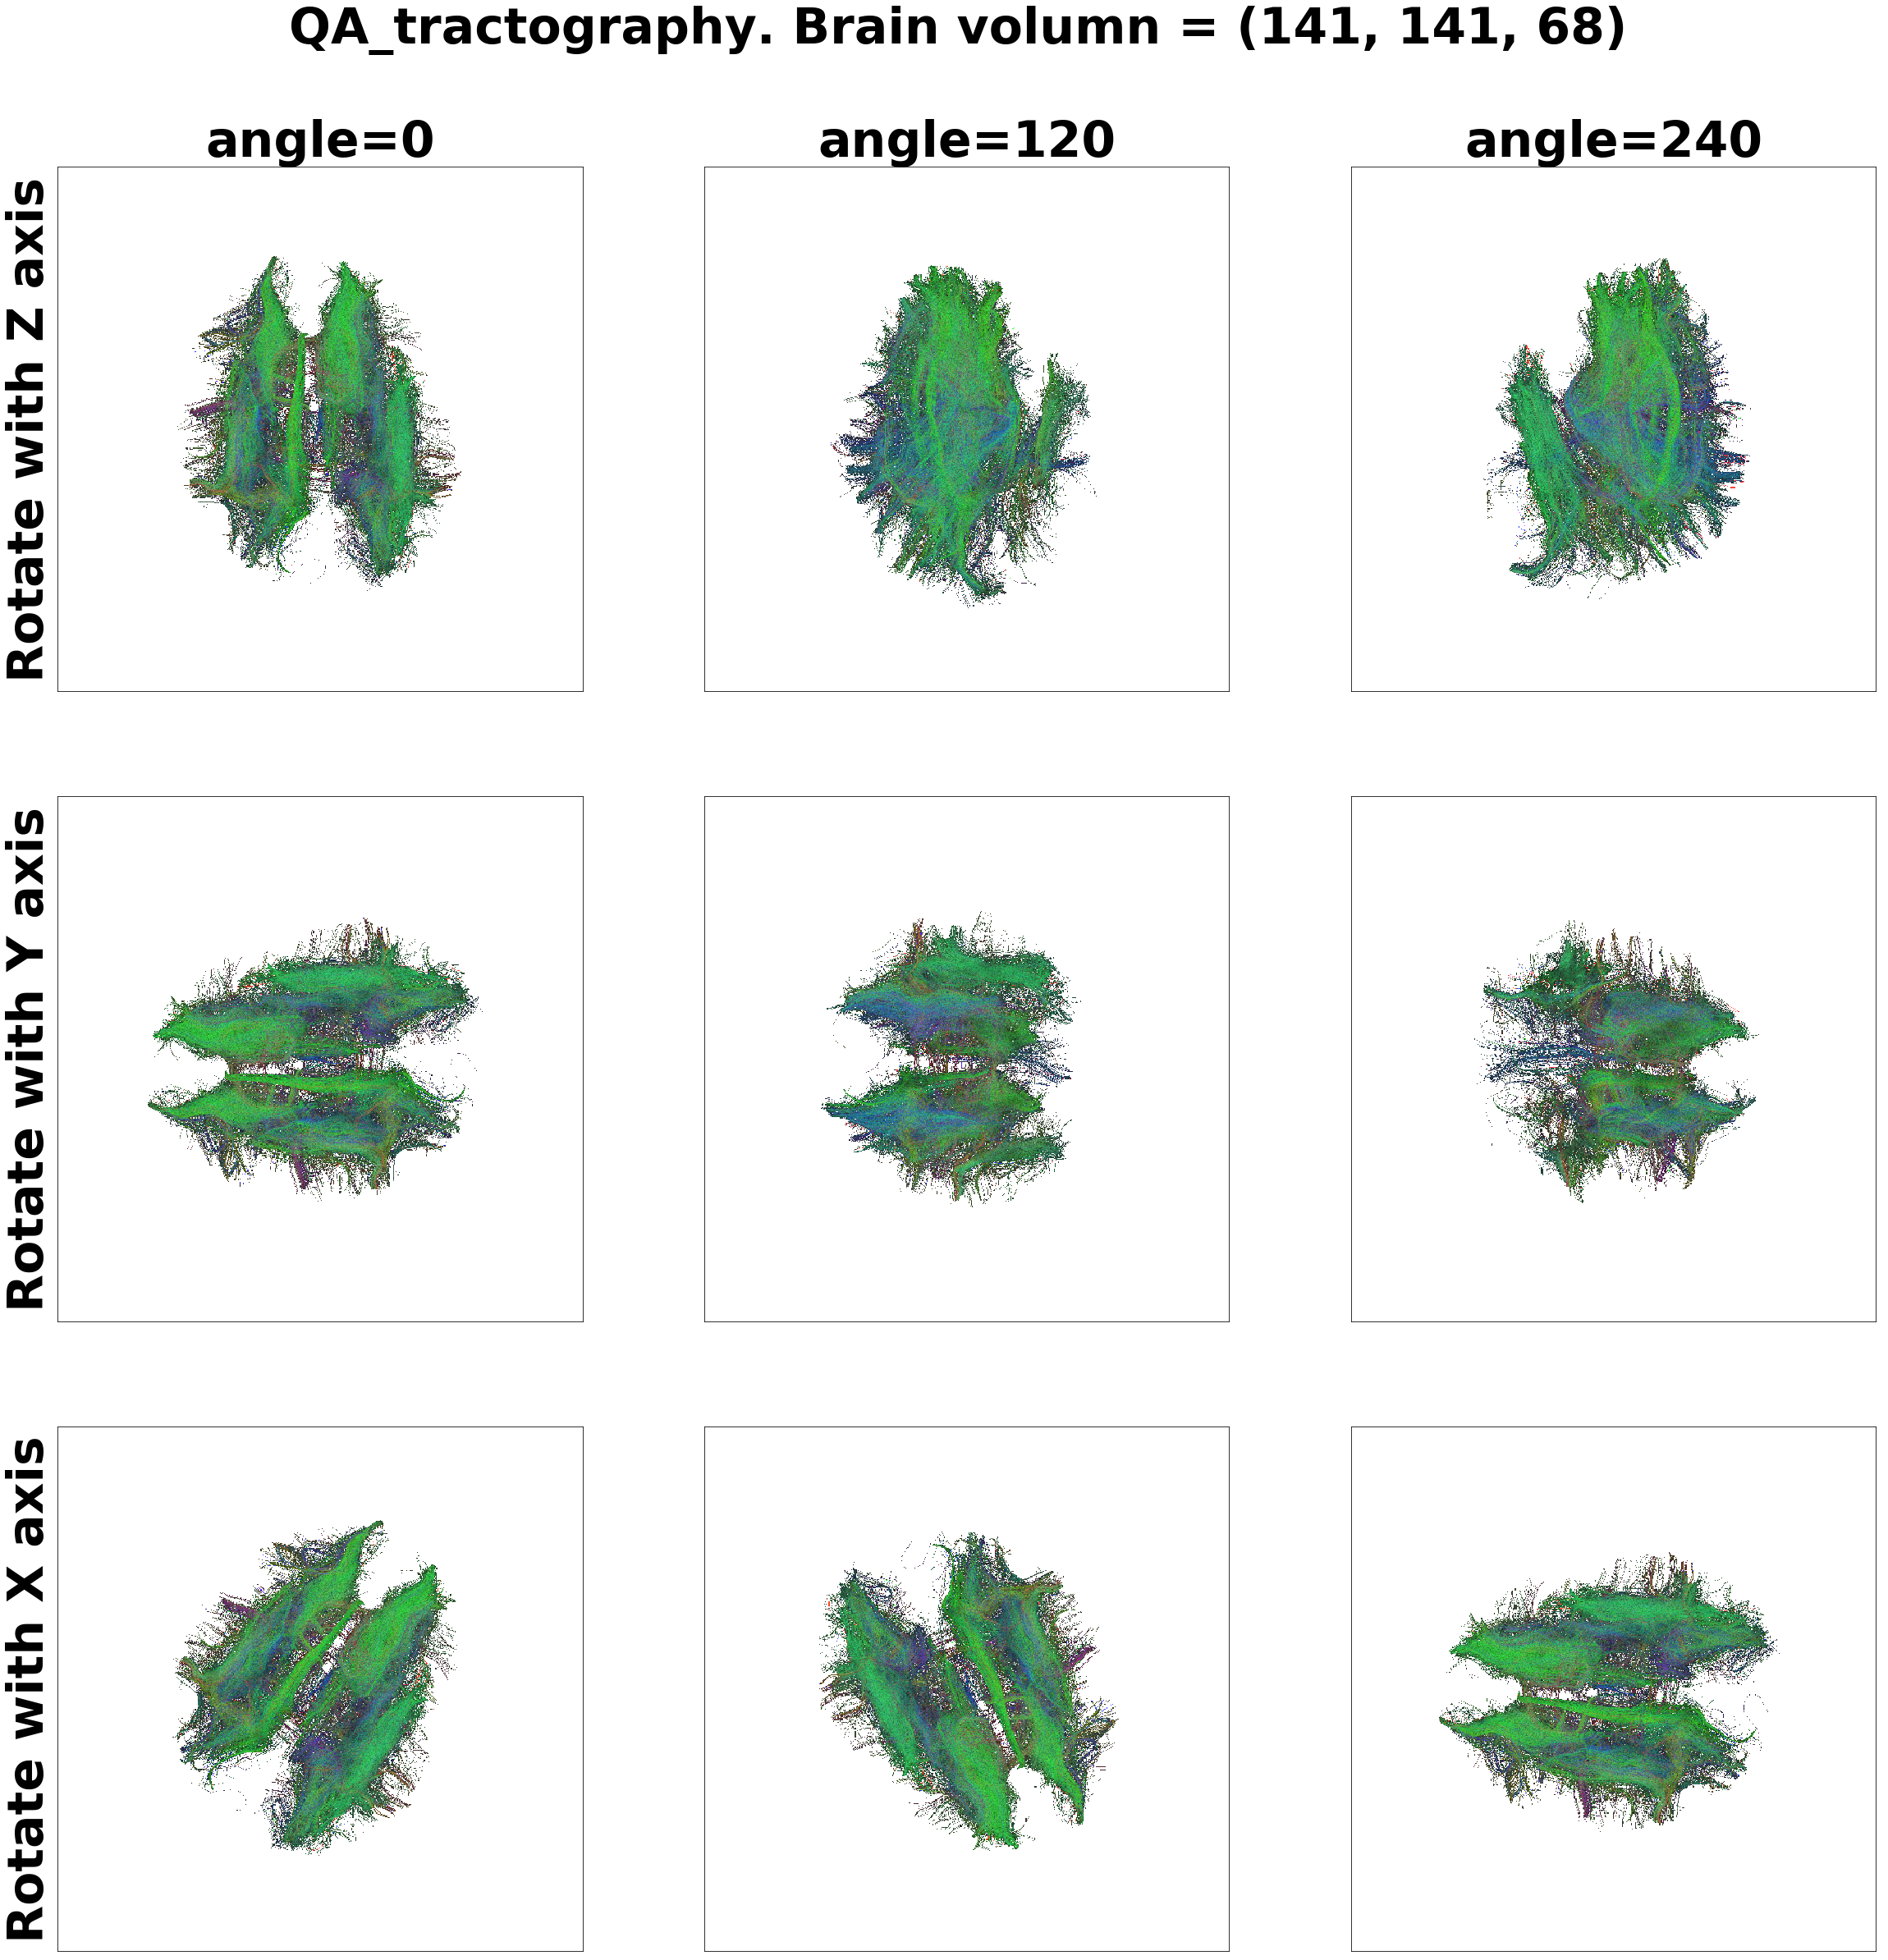

In [18]:
import nibabel as nib
import numpy as np
from fury import actor, window, colormap, ui
from dipy.tracking.streamline import Streamlines
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.colors import LinearSegmentedColormap
import os

def qa_tractography(stream_path,qa_img_path,brain_path):
    streamlines_mni = str(stream_path)
    r = window.Renderer()

    streamlines_mni_in1 = nib.streamlines.load(streamlines_mni).streamlines
    streamlines_mni_in = Streamlines(streamlines_mni_in1)
    streamlines_actor = actor.line(
        streamlines_mni_in,
        colormap.line_colors(streamlines_mni_in),
        lod_points=10000,
        depth_cue=True,
        linewidth=0.2,
        fake_tube=True,
        opacity=0.3,
    )
    r.add(streamlines_actor)

    #window.show(r)
    
    window.record(r,cam_pos = (70.03, 64.97, 269.80), cam_view = (0,1,0),path_numbering= True,out_path = qa_img_path + '/imgage1', az_ang=120,n_frames=3,reset_camera=True,size=(600,600))
    window.record(r,cam_pos = (70.03, 64.97, 269.80), cam_view = (1,0,0),path_numbering= True,out_path = qa_img_path + '/imgage2', az_ang=120,n_frames=3,reset_camera=True,size=(600,600))
    window.record(r,cam_pos = (70.03, 64.97, 269.80), cam_view = (0,0,1),path_numbering= True,out_path = qa_img_path + '/imgage3', az_ang=120,n_frames=3,reset_camera=True,size=(600,600))
    
    brain_ref = nib.load(brain_path)
    brain_ref_shape = brain_ref.shape[0:3]
    
    plt.rcParams.update({"axes.labelsize":"x-large","axes.titlesize":"x-large"})
    path_list = ['imgage1000000.png','imgage1000001.png','imgage1000002.png',
                 'imgage2000000.png','imgage2000001.png','imgage2000002.png',
                 'imgage3000000.png','imgage3000001.png','imgage3000002.png']
    labs = ["Rotate with Z axis","Rotate with Y axis","Rotate with X axis"]
    var = ["angle=0","angle=120","angle=240"]
    
    im=[] #temporary list storing the open image
    im_arr=[] #temporary list to store the image array
    
    fig= plt.figure()
    plt.title(f'QA_tractography. Brain volumn = {brain_ref_shape} \n\n', fontsize=60,fontweight='bold')
    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    
    j = 0
    for i in range(9):
        im.append(Image.open(qa_img_path + path_list[i]))
        im_arr.append(np.array(im[i]))          
        ax = fig.add_subplot(3,3,i+1)
        if i<3:
            ax.set_title(var[i],fontsize=60,fontweight='bold')
        plt.xticks([])
        plt.yticks([])
        im_arr[i] = np.where(im_arr[i]<=0.01, 255, im_arr[i])
        ax.imshow(im_arr[i],interpolation="none",alpha=0.9)

        if i % 3 == 0:
            ax.set_ylabel(labs[j],fontsize=60,fontweight='bold')
            j = j + 1
    fig.set_size_inches(40, 40, forward = True)
    fig.savefig(qa_img_path + 'qa_tractography.png', format='png')

    for my_file in path_list:
        os.chdir(qa_img_path)
        #print(os.getcwd())
        if os.path.exists(qa_img_path+ my_file):
            os.remove(my_file)
        else:
            print('no such file')
    
    
stream_path = '/Users/zhenhu/Desktop/qa_fiber/streamlines.trk'
qa_img_path = '/Users/zhenhu/Desktop/vertical/'
brain_path = '/Users/zhenhu/Documents/NDD/Downloads/ndmg_outputs2/sub-0025864/ses-1/dwi/preproc/eddy_corrected_data_reor_RAS_res.nii.gz'
qa_tractography(stream_path,qa_img_path,brain_path)
